# Examine distribution of active TEs as classified by has_promoter and is_full_length functions 

In [1]:
import logging

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
logging.getLogger('matplotlib').setLevel(logging.WARNING)
import seaborn as sns
sns.set(style='whitegrid')

from myutils.rmsk import read_rmsk

In [2]:
rmsk = read_rmsk("https://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.out.gz")
rmsk.groupby('repFamily')[['is_full_length','has_promoter']].value_counts()

2025-01-04 16:52:03 - INFO - myutils.rmsk - Reading RepeatMasker file: https://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.out.gz
2025-01-04 16:55:15 - INFO - myutils.rmsk - Calculating length of each repeat
2025-01-04 16:55:15 - INFO - myutils.rmsk - Calculating evolutionary age of each repeat
2025-01-04 16:55:15 - INFO - myutils.rmsk - Calculating full-length and promoter status of L1, Alu, and SVA repeats


repFamily      is_full_length  has_promoter
5S-Deu-L2      False           False             2550
Alu            True            True            822574
                               False           242729
               False           True            127403
                               False            46289
CR1            False           False            68182
Dong-R4        False           False              532
ERV1           False           False           180977
ERV1?          False           False             1262
ERVK           False           False            11411
ERVL           False           False           167168
ERVL-MaLR      False           False           357808
ERVL?          False           False             2245
Gypsy          False           False            17043
Gypsy?         False           False             7458
Helitron       False           False             1784
Helitron?      False           False              411
L1             False           False  

In [3]:
res = pd.DataFrame({
    "repStart": np.where(rmsk['strand'] == "+", rmsk['repStart'], rmsk['repLeft']),
    "repEnd": rmsk['repEnd'],
    "length": rmsk['length'],
    "repClass": rmsk['repClass'],
    "repFamily": rmsk['repFamily'],
    "repName": rmsk['repName'],
    "age": rmsk['age'],
    "milliDiv": rmsk['milliDiv'],
	"is_active": rmsk['is_full_length'] & rmsk['has_promoter']
})

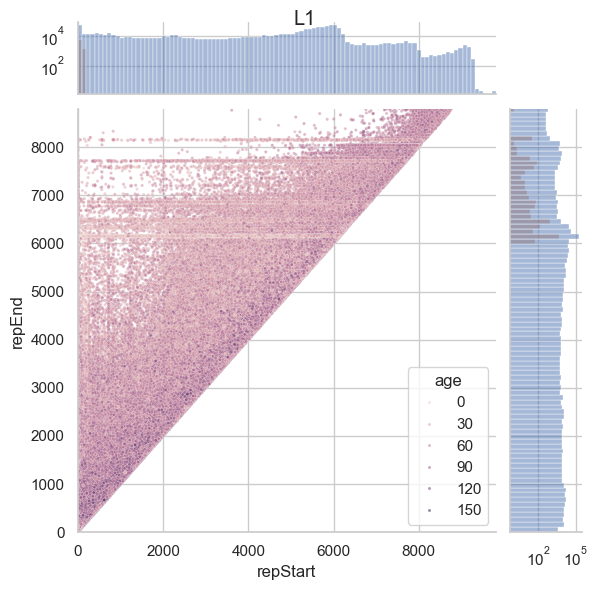

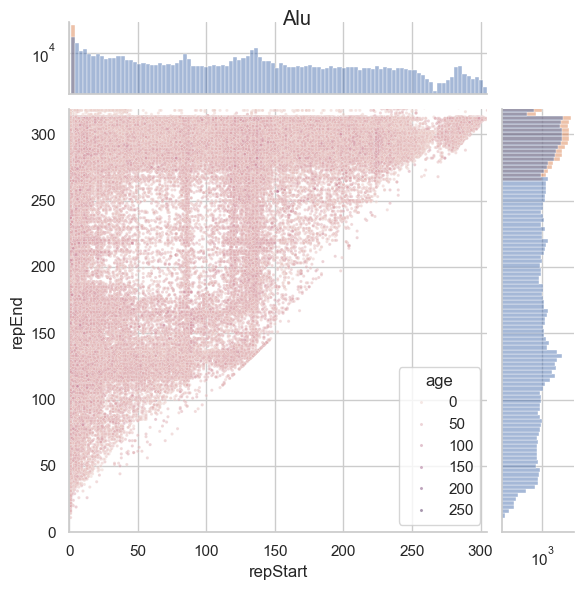

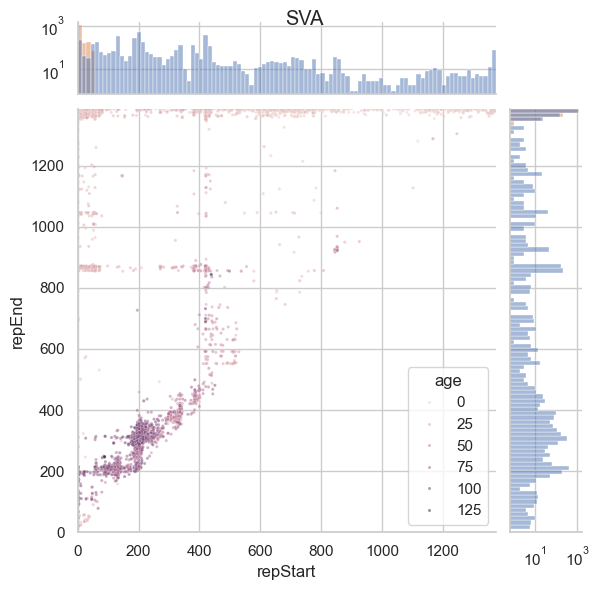

In [6]:
for f in ["L1", "Alu", "SVA"]:
	df = res[res["repFamily"] == f]
	max_length = df["length"].max()
	max_start = df["repStart"].max()
	g = sns.JointGrid(data=df, x="repStart", y="repEnd", marginal_ticks=True)
	g.plot_joint(sns.scatterplot, data=df, alpha=0.5, s=5, hue="age")
	g.plot_marginals(sns.histplot, data=df, bins=100, hue="is_active")
	g.fig.suptitle(f)
	g.ax_joint.set_ylim(0, max_length)
	g.ax_joint.set_xlim(0, max_start)
	# log sacle marginal axes
	g.ax_marg_y.set_xscale('log')
	g.ax_marg_x.set_yscale('log')
	plt.show()